# Modelisations of the distribution of the variables magnitudes (class) and depth

# 

## Loading the necessary libraries <a class="anchor" id="chapter1"></a>

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# librairie pour l'estimation des paramètres
import scipy
import scipy.stats

## Import des donneés et Analyse <a class="anchor" id="chapter1"></a>

In [2]:
# Get the data
#r = requests.get('https://raw.githubusercontent.com/eupho73/TER-BNN/main/data/data.csv')
r = requests.get('https://raw.githubusercontent.com/eupho73/TER-BNN/main/data/nn/eq_1960_2022.csv')
# Save the data
with open("eq_1960_2022.csv", 'wb') as f:
#with open("eq_data.csv", 'wb') as f:
    f.write(r.content)
    
#open the data   
data=pd.read_csv("eq_1960_2022.csv")


In [24]:
print("les dimensions", data.shape) 
data.head()

les dimensions (10599, 8)


,time,latitude,longitude,depth,mag,zone,year,month
13,2021-12-01,36.1875,140.0911,51.68,5.0,C,2021,12
20,2021-12-02,37.7216,141.7845,57.22,4.8,B,2021,12
23,2021-12-02,35.5460,139.0340,26.64,4.5,C,2021,12
24,2021-12-02,45.8325,142.5511,314.40,4.6,A,2021,12
26,2021-12-03,33.8337,135.0775,12.08,5.2,D,2021,12


In [4]:
data.describe() # Des stats rapides sur les données

,latitude,longitude,depth,mag
count,34068.000000,34068.000000,34068.000000,34068.000000
mean,37.691623,141.543955,70.260528,4.538313
std,4.033038,3.675254,93.952011,0.523106
min,30.001000,129.004000,0.000000,1.800000
25%,34.743750,140.094000,29.600000,4.200000
50%,37.277000,141.822000,35.400000,4.500000
75%,41.083150,143.357000,64.300000,4.800000
max,45.999000,148.999000,620.200000,9.100000


C:\Users\khali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


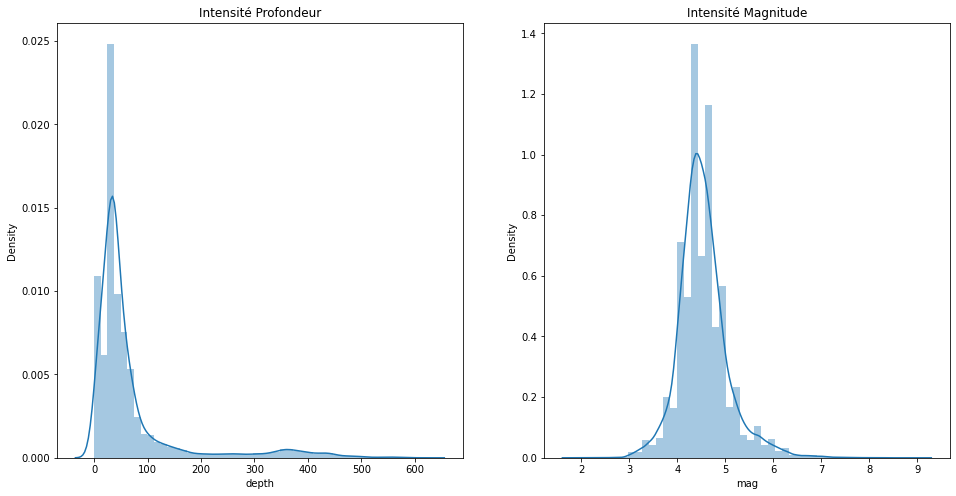

In [5]:
plt.figure(figsize = (16,8))
plt.subplot(121)
sns.distplot(data['depth'])
plt.title("Intensité Profondeur")
plt.subplot(122)
sns.distplot(data['mag'])
plt.title("Intensité Magnitude")
plt.show()

# 

## Diviser en zone

**This time, I refer to Damien's breakdown, as the aim of my work is to give him a basis for comparing these BNN releases**

In [6]:
from collections import namedtuple

Coords = namedtuple("Coords", "lat_min lat_max lon_min lon_max")
zones = {"A": Coords(41, 46, 140, 146), "B": Coords(37, 41, 138, 142), "C": Coords(34, 37, 137, 141), "D": Coords(33, 37, 133, 137), "E": Coords(31, 36, 129, 133), "F": Coords(38, 41, 142, 144), "G": Coords(36, 38, 141, 143)}

def to_5_zone(lat: float, lon: float):
    """Convert coordinates to a zone number according to the map arrangement above"""
    for zone, coord in zones.items():
        if (coord.lat_min <= lat <= coord.lat_max) & (coord.lon_min <= lon <= coord.lon_max):
            return zone
    return 0
data["zone"] = data.apply(lambda x: to_5_zone(x['latitude'], x['longitude']), axis=1)

In [7]:
data.tail()

,time,latitude,longitude,depth,mag,zone
34063,1960-03-23,39.137,143.598,25.0,5.9,F
34064,1960-03-23,39.146,143.564,25.0,5.8,F
34065,1960-03-23,39.235,143.303,15.0,6.2,F
34066,1960-02-04,38.667,143.014,25.0,6.1,F
34067,1960-01-31,33.093,134.885,20.0,6.3,D


In the context of cat bond pricing, we are interested in QEs capable of triggering a loss. Here we choose those whose magnitudes are greater than 4.5 with reference to this table.
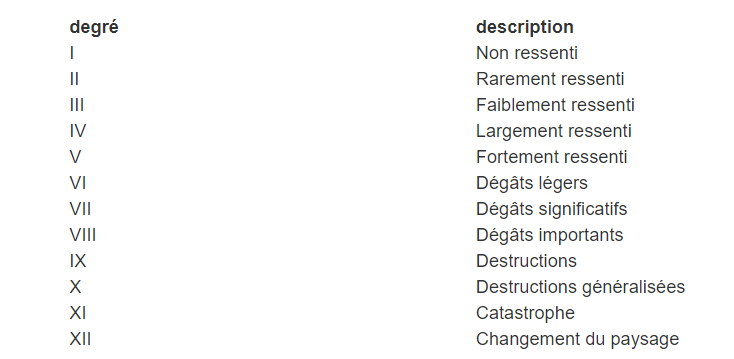

In [8]:
# We delete the irrelevant observations (which are not the areas defined from A to G and the magnitudes are less than 4.5)

data = data[(data.mag >= 4.5) & (data.zone != 0)]
#data = data[data.zone != 0]
data.head()

,time,latitude,longitude,depth,mag,zone
13,2021-12-01,36.1875,140.0911,51.68,5.0,C
20,2021-12-02,37.7216,141.7845,57.22,4.8,B
23,2021-12-02,35.5460,139.0340,26.64,4.5,C
24,2021-12-02,45.8325,142.5511,314.40,4.6,A
26,2021-12-03,33.8337,135.0775,12.08,5.2,D


# 

We extract the years and months from the variable time to create 2 variables on which we will perform a groupby (ref Damien dt = month)

In [9]:
import datetime as dt 
data['time']= pd.to_datetime(data['time'])
#pd.DatetimeIndex(data['time']).year
data['year']= (data['time']).apply(lambda x: x.year)
data['month']= (data['time']).apply(lambda x: x.month)

In [10]:
data.head()

,time,latitude,longitude,depth,mag,zone,year,month
13,2021-12-01,36.1875,140.0911,51.68,5.0,C,2021,12
20,2021-12-02,37.7216,141.7845,57.22,4.8,B,2021,12
23,2021-12-02,35.5460,139.0340,26.64,4.5,C,2021,12
24,2021-12-02,45.8325,142.5511,314.40,4.6,A,2021,12
26,2021-12-03,33.8337,135.0775,12.08,5.2,D,2021,12


# 

# Modelling Intensity

### Mag

***Calculation of max mag per month and per zone  ( ref to the article of J. Shao et al. "Catastrophe risk bonds with applications
to earthquakes")***
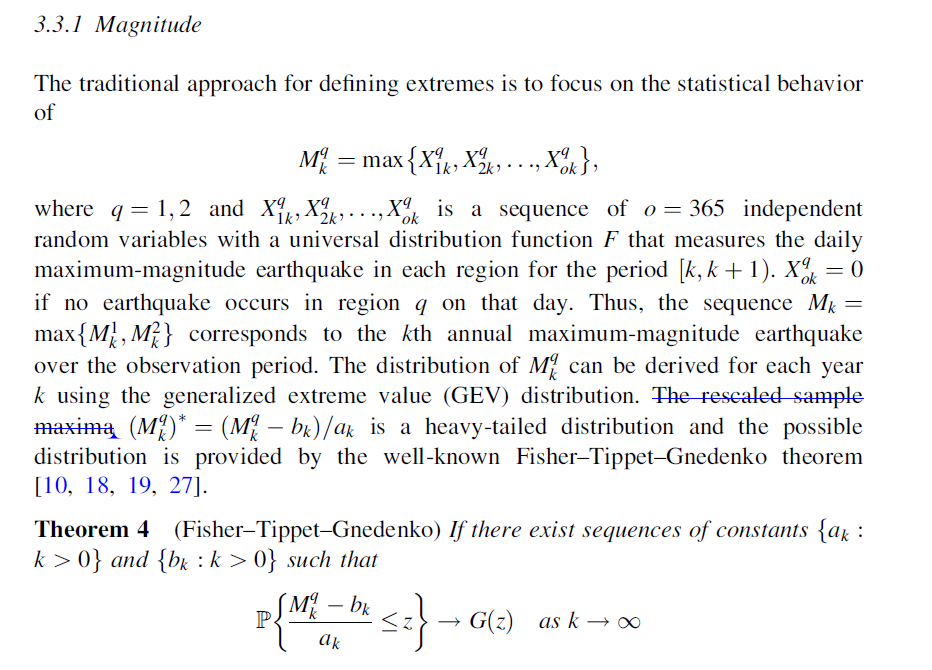

In [11]:
temp = data.groupby(['year','month','zone'], as_index = False)

df_max_per_month_per_zone = temp.mag.max()
df_max_per_month_per_zone.rename({"mag":"max_mag"},axis=1,inplace=True)
df_max_per_month_per_zone.tail() 



,year,month,zone,max_mag
2874,2021,12,A,5.1
2875,2021,12,B,5.1
2876,2021,12,C,5.0
2877,2021,12,D,5.2
2878,2021,12,G,4.6


 max_mag correspond à la variable 
$
M_{k}^{q}=\max \left\{X_{1 k}^{q}, X_{2 k}^{q}, \ldots, X_{o k}^{q}\right\}
$
Où $q=1,2,\ldots,7 $ et $X_{1 k}^{q}, X_{2 k}^{q}, \ldots, X_{o k}^{q}$ est une séquence de $o=30$ observations independentes entre le mois k et k+1.

### Pour estimer les paramètres

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html

On crée un dictionnaire dicos_zone qui regroupe les zones et observations associées

In [12]:
dicos_zones_max_mag ={name:data for name, data in zip(zones.keys(),
                                              [df_max_per_month_per_zone[df_max_per_month_per_zone['zone']== k] 
                                               
                                               for k in df_max_per_month_per_zone['zone'].unique()])}

In [13]:
dicos_zones_max_mag['A']['max_mag']

0       6.3
11      5.6
14      6.8
20      6.2
35      6.3
       ... 
2824    4.7
2846    4.7
2853    4.5
2864    4.7
2877    5.2
Name: max_mag, Length: 200, dtype: float64

In [14]:
from scipy.stats import genextreme as gnx 

In [15]:
param = gnx.fit(dicos_zones_max_mag['A']['max_mag'])

In [16]:

loc = param[-2]
scale = param[-1]
arg = param[:-2]

y, x= np.histogram(dicos_zones_max_mag['A']['max_mag'], bins=500, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
pdf = gnx.pdf(x, *arg, loc=loc, scale=scale)

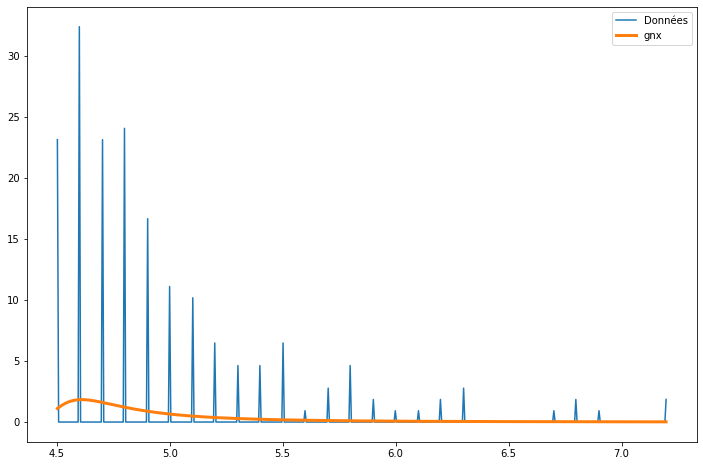

In [17]:
plt.figure(figsize=(12,8))
plt.plot(x, y, label="Données")
plt.plot(x, pdf, label='gnx', linewidth=3)
#plt.title("{}".format(pd.DataFrame(data).columns))
plt.legend(loc='upper right')
plt.show()

Modeling not good, the "genextreme" law of extreme values whose parameters we estimated from the observations in our database does not seem to model the distribution well. This result contradicts what has been described in the CAT BOND PRICING.pdf document.

###  Analyse de commentaire

There is an explanation for this. Indeed, according to the theorem described in the pricing paper :


**Theorem 4 (Fisher-Tippet-Gnedenko) If there exist sequences of constants $\left\{a_{k}\right.$ : $k>0\}$ and $\left\{b_{k}: k>0\right\}$ such that**
$$
\mathbb{P}\left\{\frac{M_{k}^{q}-b_{k}}{a_{k}} \leq z\right\} \rightarrow G(z) \quad \text { as } k \rightarrow \infty
$$
This is the random variate $\left\{\frac{M_{k}^{q}-b_{k}}{a_{k}} \leq z\right\}$ which follows a law **genextreme** and not just the variable $ \left\{ M_{k}^{q} \leq z\right\}$. 
So we need to determine the 2 suites $\left\{a_{k}\right.$ : $k>0\}$ and $\left\{b_{k}: k>0\right\}$ in order to transform our variable $M_{k}^{q}$

### Calcul de $b_{n}$ et  $a_{n}$

This site gives a theoretical explanation of the calculation of bn and a_n.

https://gaz.wiki/wiki/fr/Fisher%E2%80%93Tippett%E2%80%93Gnedenko_theorem

We understand after reading, that to be able to calculate b_n and a_n, we need a parameter \gamma. Now this last one is precisely part of the parameters that we try to estimate.
Surely there must be other alternatives for calculating b_n and a_n. To be reviewed...

Inès found a way to estimate parameters thank to the site :\

https://docplayer.fr/179133972-Theorie-des-valeurs-extremes-et-gestion-des-risques-extremes.html

she implemented the method in the R-language

# 

 ### Depth

**This modelling was already done in a previous code**

# 


# Modelling frequency

In [105]:
# The observations are grouped by month and the number of QEs in the month is counted
temp2 = data.groupby(['year','month','zone'], as_index = False)

df_nb_per_month_per_zone = temp2.mag.count() # we count

df_nb_per_month_per_zone.rename({"mag":"nb_EQ"},axis=1,inplace=True)
df_nb_per_month_per_zone.tail() 

,year,month,zone,nb_EQ
2874,2021,12,A,7
2875,2021,12,B,5
2876,2021,12,C,4
2877,2021,12,D,1
2878,2021,12,G,1


In [106]:
# We divide the database into zones defined in the zone dictionary,
# and we create a new dicos_zone dictionary which groups all these zones with the corresponding observations.

dicos_zones_nb_EQ ={name:data for name, data in zip(zones.keys(),
                                              [df_nb_per_month_per_zone[df_nb_per_month_per_zone['zone']== k] 
                                               
                                               for k in df_nb_per_month_per_zone['zone'].unique()])}

## Poisson

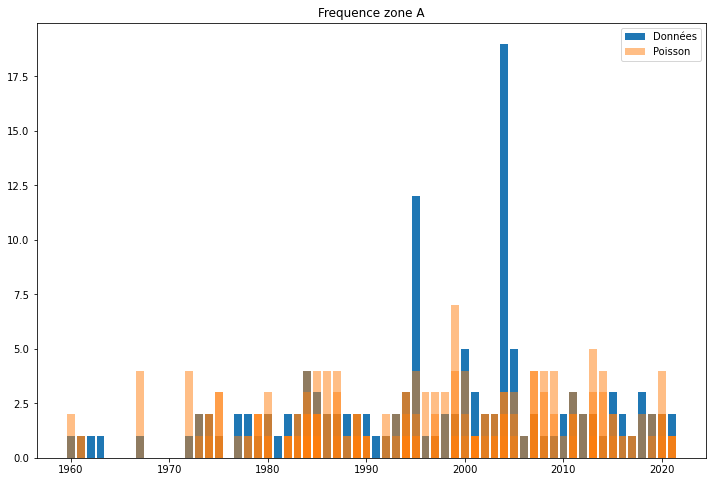

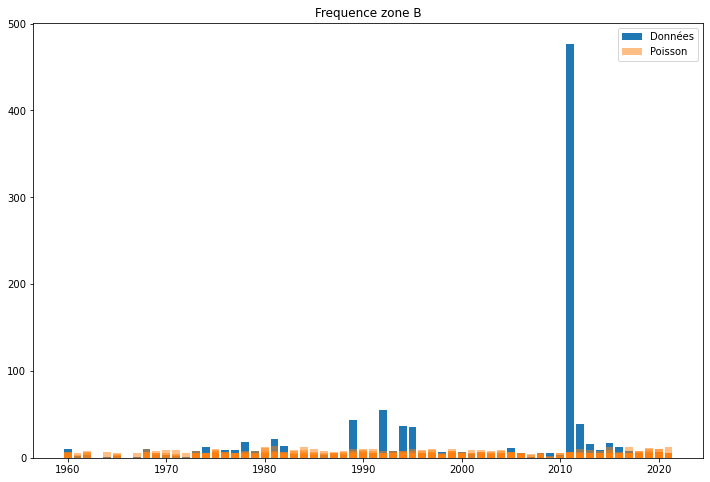

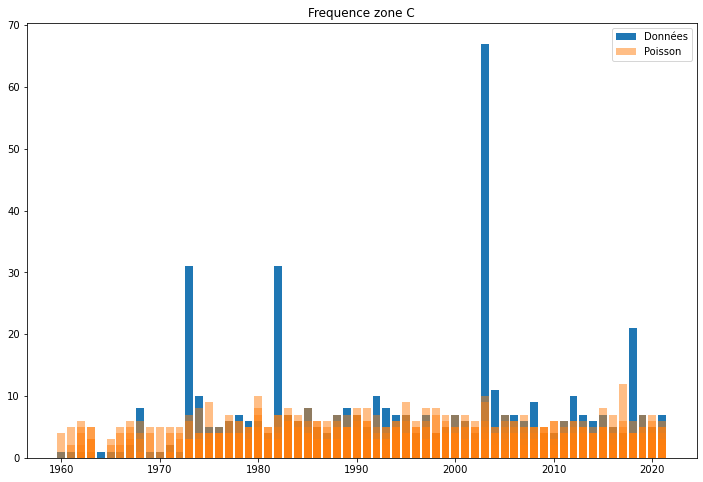

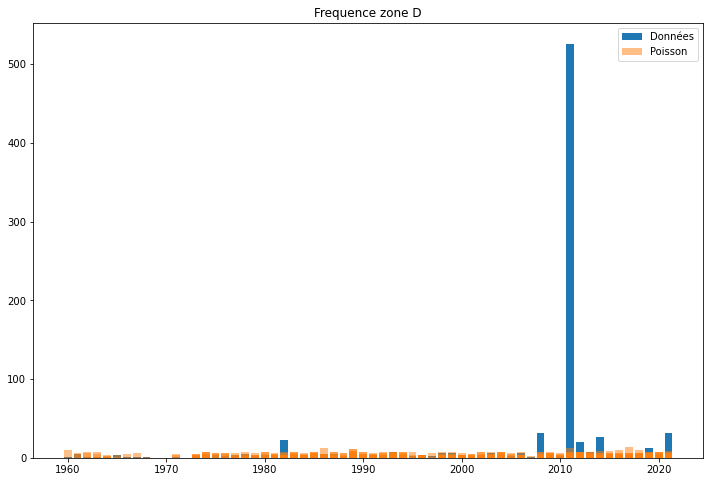

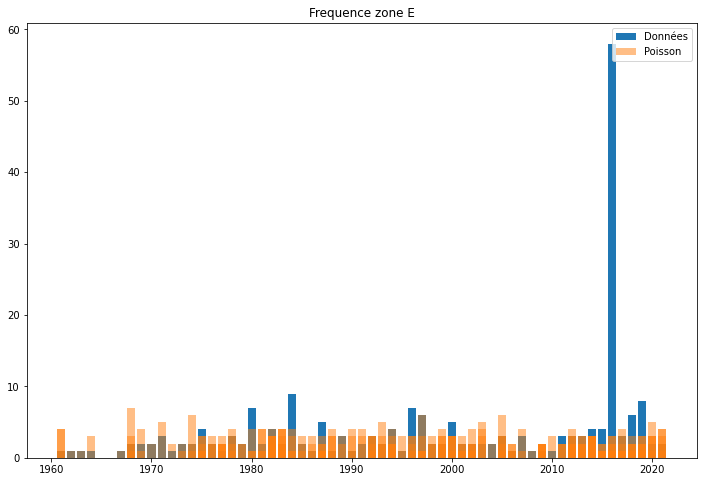

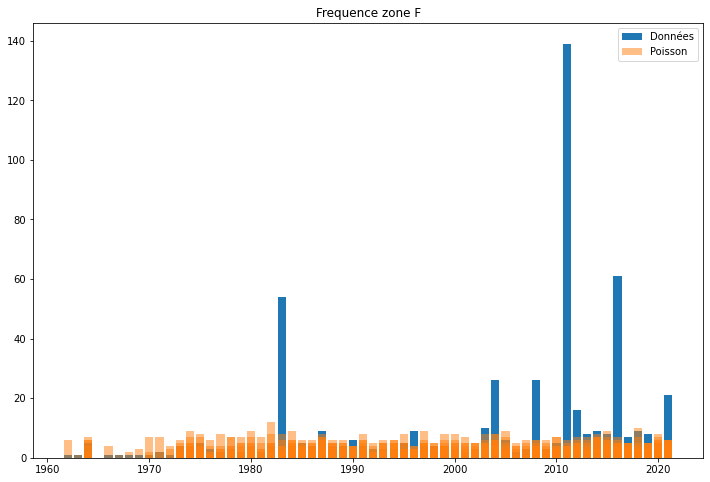

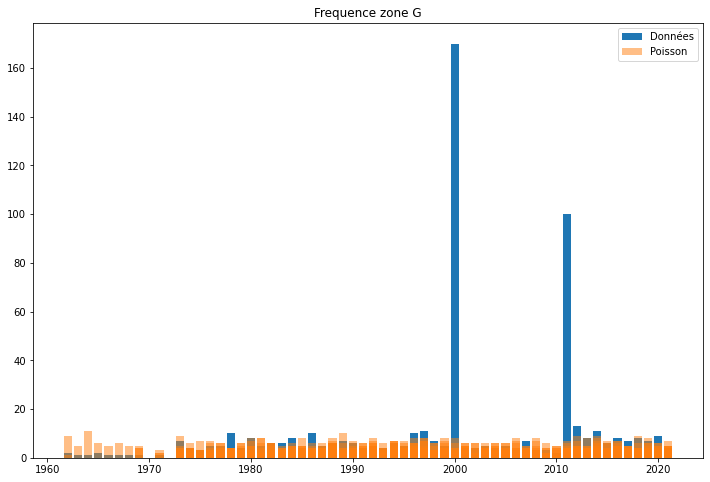

In [22]:

for zone in zones.keys():   
    mu = np.mean(dicos_zones_nb_EQ[zone].nb_EQ) # estimator of the fish parameter
    
    pmf=scipy.stats.poisson.rvs(mu=mu,size=len(dicos_zones_nb_EQ[zone].nb_EQ)) #simulation
    
    plt.figure(figsize=(12,8))
    plt.bar(dicos_zones_nb_EQ[zone].year,height=dicos_zones_nb_EQ[zone].nb_EQ,label="Données")
    plt.bar(dicos_zones_nb_EQ[zone].year, pmf, label="Poisson",alpha=0.5)
    plt.legend(loc='upper right')
    plt.title("Frequence zone {}".format(zone))
    plt.show()
    

Statistical modelling with a poisson distribution does not capture the high frequencies associated with certain areas and periods. Are these frequencies related to observations (outliers)? Should they be suppressed or are they significant outliers? (A)

Other sources of explanation would be: 

    *The fish law has constant and equal mean and variance, so it becomes unsuitable for our dataset (1).
    *The grouping by **Time interval dt = month** is either too grotesque or too minimalist.
    *The mu parameter is not constant over time(3) (Introduce then a mu function (time variable) (3)


# 

### Analysis of the above comments

Comment(A) : Some observations associated with the 2000 - 2010 period interval have very high EQ frequencies. If this appears to be an outlier, we can discount the relevance or significance of these outliers as this is unique to EQs.\
**Over a period of time, QRs can be phenomena of high intensity and high frequency.**

For comment (2): We set a time interval **dt = month because this corresponds to the input dt for our neural networks, and we want to have a basis for comparison**

For comment (3): **There is no particular pattern - in the distribution of our frequencies over time - that would allow us to define a mu(t) function**. For example, if we were able to say that the frequency of QEs is highly increasing between the years 2000 and 2010, and then decreasing after that period, then we could easily define a mu(t) function that accounts for this behaviour.

To address the problem raised by comment 1, **we use a statistical modelisation with the negative binomial distribution.** This is a counting law which, unlike the fish law, allows us to measure over-dispersion. It is particularly useful for discrete data, with values in a positive, non-bounded set, whose empirical variance exceeds the empirical mean. If a Poisson is used to model such data, the mean and variance must be equal. In this case, the observations are "over-dispersed" with respect to the Poisson model. Since the negative binomial distribution has an additional parameter, it can be used to adjust the variance independently of the mean.

## Negative binomial modelling

###  Estimation of the parameters of the negative binomial

In [74]:
# We implement the maximum likelihood estimators of params p and r (ref to doc sent by Inès) """"

def estimer_params(zone):
    size = len(dicos_zones_nb_EQ[zone].nb_EQ)
    sigma = np.var(dicos_zones_nb_EQ[zone].nb_EQ)*len(dicos_zones_nb_EQ[zone].nb_EQ)/(size-1)
    mu = np.mean(dicos_zones_nb_EQ[zone].nb_EQ)
    r = (mu**2) / (sigma - mu)
    p = r/(mu + r)**2 #Probability of successful sales call
    return r,p,size



In [76]:
#For example, for zone C
estimer_params('C')

(0.7684045414186288, 0.04488950476766955, 599)

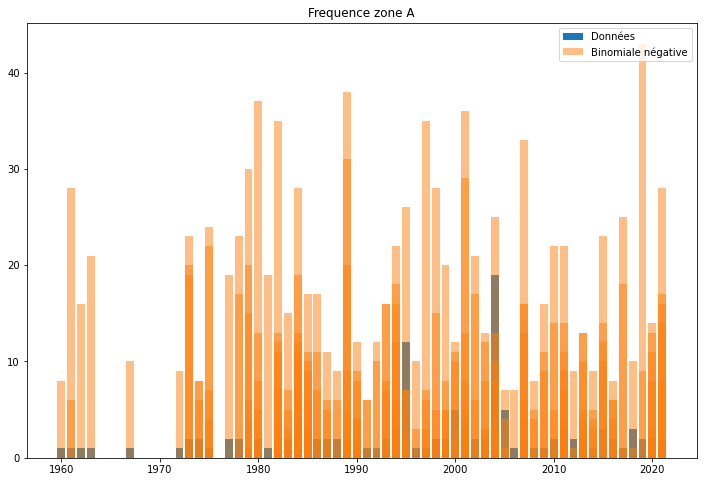

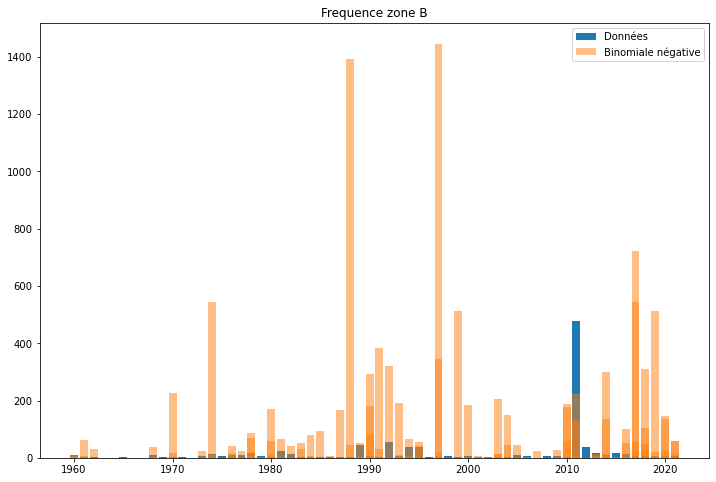

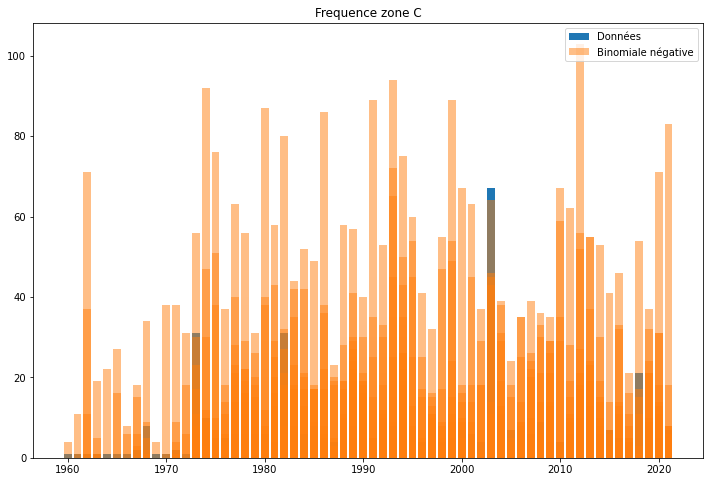

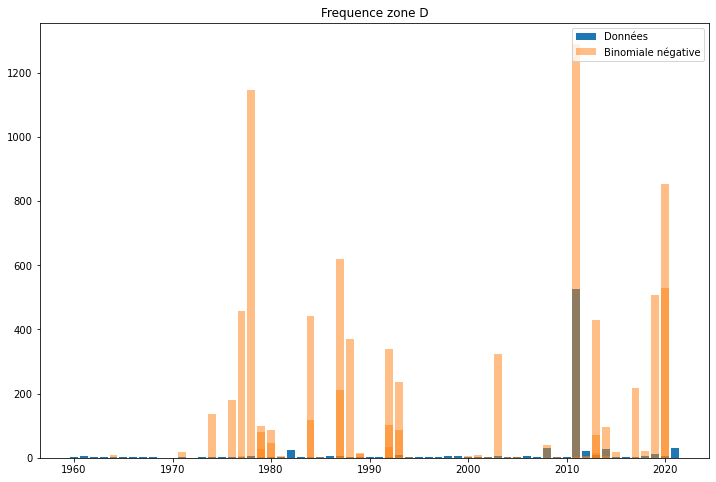

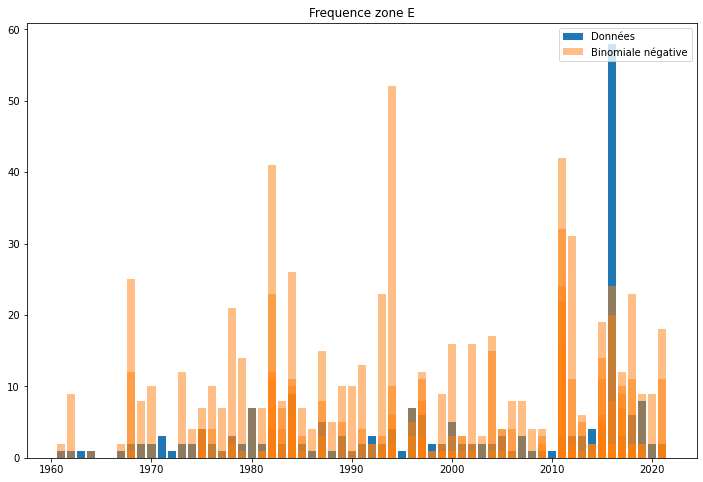

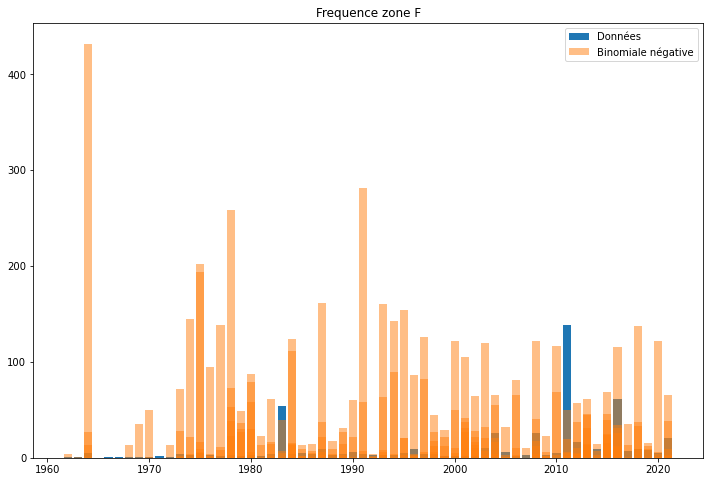

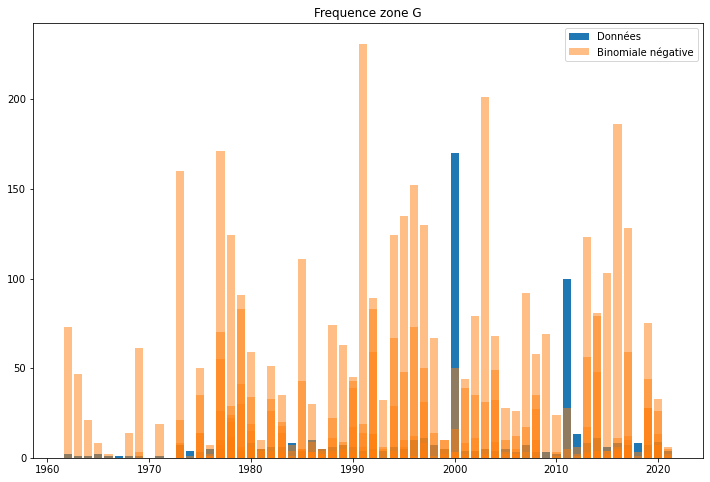

In [120]:
# Estimating and plotting for all area
for zone in zones.keys():   
    
    # On estime les paramètres de la loi binomiale pour chaque zone
    r, p, size = estimer_params(zone) 
   
    # Simulation avec les paramètres estimés
    rvs=nbinom.rvs(r, p, size = size)
    plt.figure(figsize=(12,8))
    
    #plotting
    plt.bar(dicos_zones_nb_EQ[zone].year,height=dicos_zones_nb_EQ[zone].nb_EQ,label="Données")
    plt.bar(dicos_zones_nb_EQ[zone].year, rvs, label="Binomiale négative",alpha=0.5)
    plt.legend(loc='upper right')
    plt.title("Frequence zone {}".format(zone))
    plt.show()


Big difference with the Poisson distribution, we see the negative binomial has a very high variance and better captures the frequency variations of our data sets. The only downside is that it does it too often!

Documentation on the nbinom law:\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html